In [1]:
is_notebook = True

In [2]:
import numpy as np
from scipy.interpolate import interpn

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
%matplotlib inline
import matplotlib_inline

In [4]:
if is_notebook:
    %matplotlib widget

In [5]:
# import density plot function
from utils import genFigures as gf

## Get the data from the analog computing simulation

In [6]:
data_path = './Sim_data/Prewitt/'
data_file = 'Analog_Chelsea_Greys_distribution_y_noise_SNR=25dB_RMSE=0.02708.bin'
expected_data_file = 'Analog_Chelsea_Greys_distribution_x_standardSNR=25dB_RMSE=0.02708.bin'

save_to_path = './Sim_results/'

In [7]:
# analog = False
# if results_file[0:6] == 'Analog':
#     analog = True
text_file_name_split = data_file.split("_")
scheme = text_file_name_split[0]

In [8]:
with open(data_path+data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Results ' +data_file + ' loaded.')
result = np.frombuffer(buffer)

with open(data_path+expected_data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Expected results ' +expected_data_file + ' loaded.')
genie_result = np.frombuffer(buffer)

Results Analog_Chelsea_Greys_distribution_y_noise_SNR=25dB_RMSE=0.02708.bin loaded.
Expected results Analog_Chelsea_Greys_distribution_x_standardSNR=25dB_RMSE=0.02708.bin loaded.


## Plot the waveforms

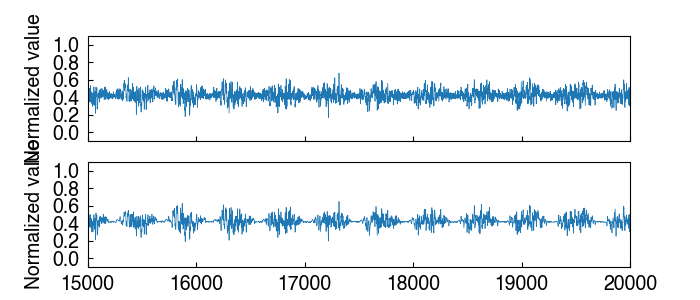

In [9]:
fig, ax = gf.plot_waveform_comparison(result, genie_result)

In [10]:
fig.savefig(save_to_path+'waveform_'+data_file[:-4:]+'_zoomedIn_1c5e4_2e4.svg', format='svg', dpi=600)

## Plot the signal distribution of y and y_

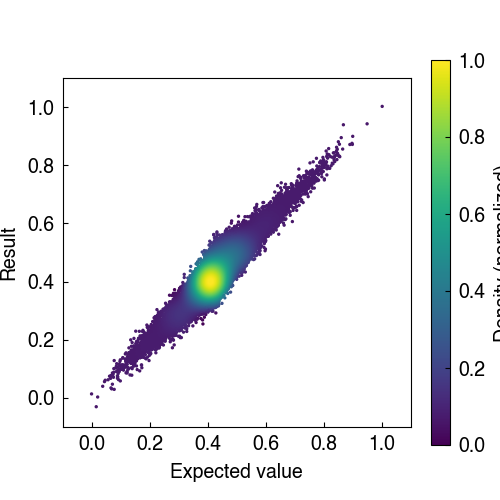

In [11]:
# Plot the signal-genie distribution with rasterized points but vector axes
ax_3b = gf.plot_density_scatter(genie_result, result, dot_size=2, bins=11, cmap='viridis', rasterized=True)

In [12]:
ax_3b.get_figure().savefig(save_to_path+'figure3b.svg', transparent=True, dpi=600, format='svg')

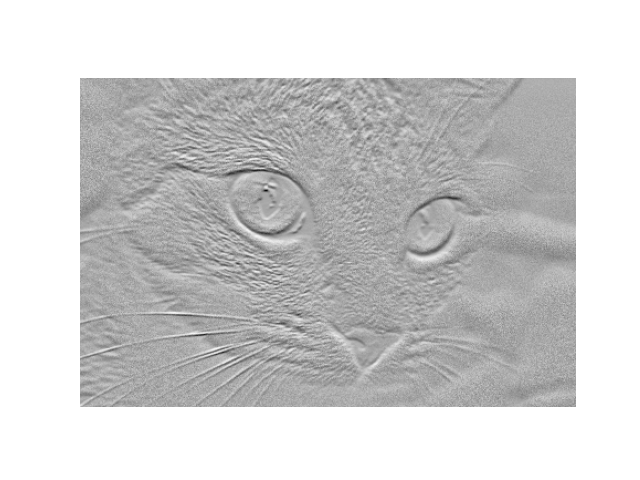

In [13]:
# reshape the data to the image
image_data = np.reshape(result, [300-2, 451-2])  # No padding, only grey channel processed

# plot the image without axes
plt.figure()
ax_5e_processed = plt.imshow(image_data, cmap='Greys')
plt.axis('off')  # Turn off axes

# Save the figure as SVG without white padding
save_file_path = save_to_path + './figure3b_image.svg'
plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)

## Plot the noise distribution

Maximum probability is: 0.04827282.
σ is: 0.027.
Calculation precision is: 3.622 bits (3σ).
Calculation precision is: 5.206 bits (σ).
Sum of all probability is: 1.000 (Expected to be 1).


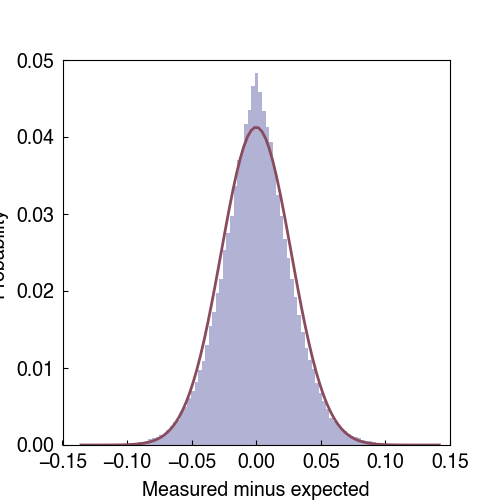

In [14]:
ax_3d = gf.plot_noise_dist(result, genie_result, scheme='Analog', bins=101)

In [15]:
ax_3d.get_figure().savefig(save_to_path+'figure3d.svg', format='svg', dpi=600)

# Load data from digital computing simulation

In [16]:
data_path = './Sim_data/Prewitt/'
data_file = 'Digital_Chelsea_Greys_distribution_y_noise_SNR=25dB_RMSE=0.00121.bin'
expected_data_file = 'Digital_Chelsea_Greys_distribution_x_standardSNR=25dB_RMSE=0.00121.bin'

save_to_path = './Sim_results/'

In [17]:
# analog = False
# if results_file[0:6] == 'Analog':
#     analog = True
text_file_name_split = data_file.split("_")
scheme = text_file_name_split[0]

In [18]:
with open(data_path+data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Results ' +data_file + ' loaded.')
result = np.frombuffer(buffer)

with open(data_path+expected_data_file, 'rb') as file:
        buffer = file.read()
file.close()
print('Expected results ' +expected_data_file + ' loaded.')
genie_result = np.frombuffer(buffer)

Results Digital_Chelsea_Greys_distribution_y_noise_SNR=25dB_RMSE=0.00121.bin loaded.
Expected results Digital_Chelsea_Greys_distribution_x_standardSNR=25dB_RMSE=0.00121.bin loaded.


## Plot the waveforms

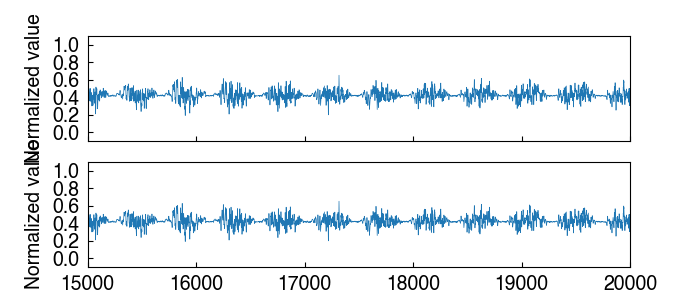

In [19]:
fig, ax = gf.plot_waveform_comparison(result, genie_result)

In [20]:
fig.savefig(save_to_path+'waveform_'+data_file[:-4:]+'_zoomedIn_1c5e4_2e4.svg', format='svg', dpi=600)

## Plot the signal distribution of y and y_

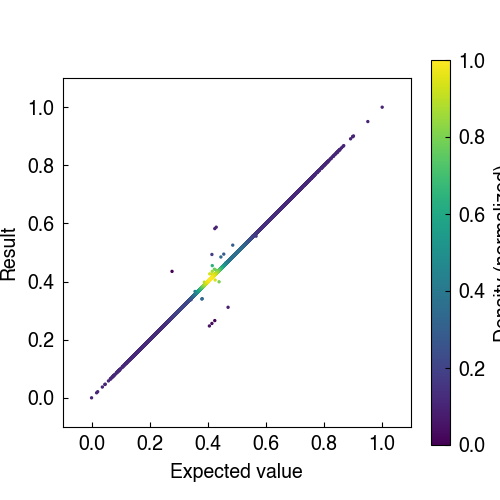

In [21]:
# Plot the signal-genie distribution with rasterized points but vector axes
ax_3c = gf.plot_density_scatter(genie_result, result, dot_size=2, bins=11, cmap='viridis', rasterized=True)

In [22]:
ax_3c.get_figure().savefig(save_to_path+'figure3c.svg', transparent=True, dpi=600, format='svg')

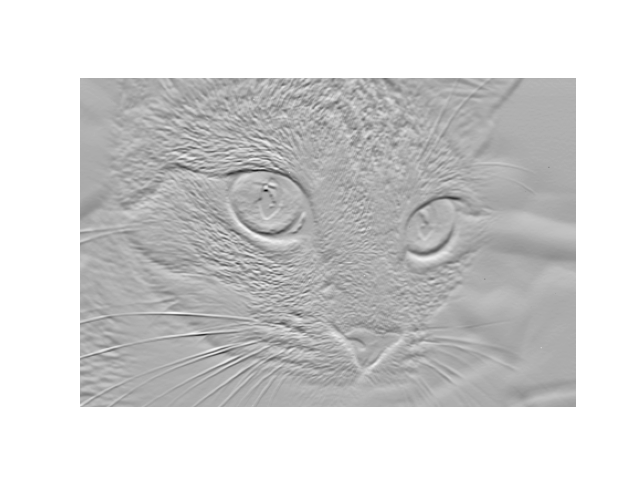

In [23]:
# reshape the data to the image
image_data = np.reshape(result, [300-2, 451-2])  # No padding, only grey channel processed

# plot the image without axes
plt.figure()
ax_5e_processed = plt.imshow(image_data, cmap='Greys')
plt.axis('off')  # Turn off axes

# Save the figure as SVG without white padding
save_file_path = save_to_path + './figure3c_image.svg'
plt.savefig(save_file_path, format='svg', bbox_inches='tight', pad_inches=0)

## Plot the noise distribution

Maximum probability is: 0.99974589.
Sum of all probability is: 1.000 (Expected to be 1).


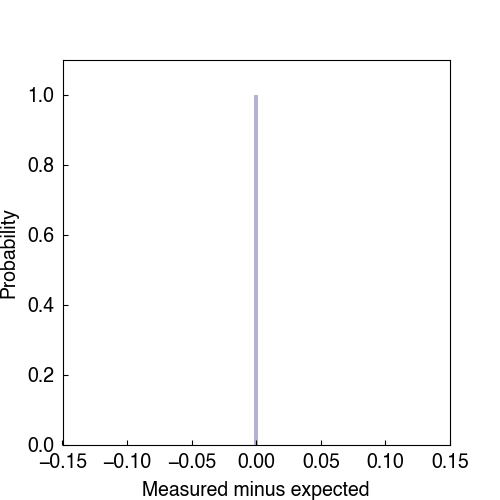

In [24]:
ax_3e = gf.plot_noise_dist(result, genie_result, scheme='Digital', bins=101)

In [25]:
ax_3e.get_figure().savefig(save_to_path+'figure3e.svg', format='svg', dpi=600)

# RMSE simulation results

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv(data_path+'RMSE_SNR.csv',
        header=0, delimiter="\t", decimal=",")

In [28]:
df

,SNR (dB),RMSE (analog),RMSE (digital)
0,0,0.48361,0.08536
1,5,0.27033,0.07991
2,10,0.15277,0.06081
3,15,0.08592,0.04280
4,20,0.04820,0.01806
5,25,0.02708,0.00121
6,30,0.01527,0.00000
7,35,0.00858,0.00000
8,40,0.00482,0.00000
9,45,0.00272,0.00000


In [29]:
snr = df['SNR (dB)'].to_numpy()
rmse_analog = df['RMSE (analog)'].to_numpy()
rmse_digital = df['RMSE (digital)'].to_numpy()

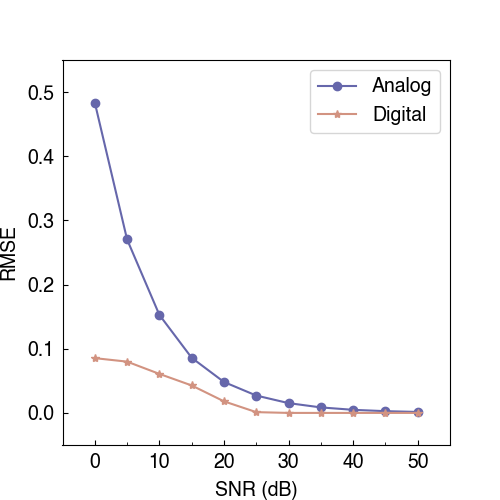

In [30]:
ax_3f = gf.plot_RMSE_measurements(snr, rmse_analog, rmse_digital, zoom=False)
ax_3f.get_figure().savefig(save_to_path+'figure3f.svg', format='svg', dpi=600)

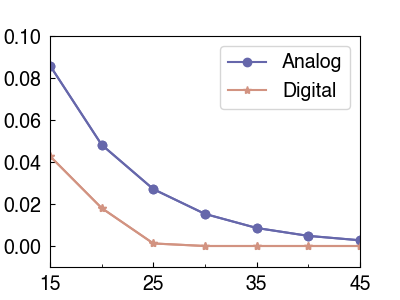

In [31]:
ax_3f_zoom = gf.plot_RMSE_measurements(snr, rmse_analog, rmse_digital, zoom=True)
ax_3f_zoom.get_figure().savefig(save_to_path+'figure3f_zoom.svg', format='svg', dpi=600)